In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import glob

from utils import (singles, xywh2xyxy, xywhRead, relax, cropLarge)

In [120]:
testDir = 'test'
trainDir = 'train'

singleBBox = singles(testDir)
np.random.shuffle(singleBBox)

In [121]:
bigImg = cropLarge(cv2.imread('large_images_no_seals/1V1A8849.JPG'), size=800)

for impath in singleBBox:
    txtpath = impath + '.txt'
    impath += '.JPG'

    img = cv2.imread(impath)
    mask = np.zeros(img.shape[:-1], dtype=np.uint8)
    w, h = img.shape[1], img.shape[0]

    xywh = xywhRead(txtpath)
    init_wh = xywh[:, [2, 3]].squeeze()  # we only need inital width and height as x and y will correspond to the center of the new image
    
    xywh = relax(xywh)
    xyxy = xywh2xyxy(xywh)

    # converting to pixel coordinates
    xyxy[:, [0, 2]] = xyxy[:, [0, 2]] * w
    xyxy[:, [1, 3]] = xyxy[:, [1, 3]] * h
    xyxy = xyxy.round().astype(int).squeeze()
    xmin, ymin = xyxy[0], xyxy[1]
    xmax, ymax = xyxy[2], xyxy[3]

    smallCrop = img[ymin:ymax, xmin:xmax, :]
    mask[ymin:ymax, xmin:xmax] = 255
    mask = cv2.resize(mask, (0,0), fx=0.4, fy=0.4)
    img = cv2.resize(img, (0,0), fx=0.4, fy=0.4)
    for _ in range(33):
        dstImg = next(bigImg).astype(np.uint8)
    out = cv2.seamlessClone(img, dstImg, mask, (300, 300), cv2.MIXED_CLONE)
    break
    



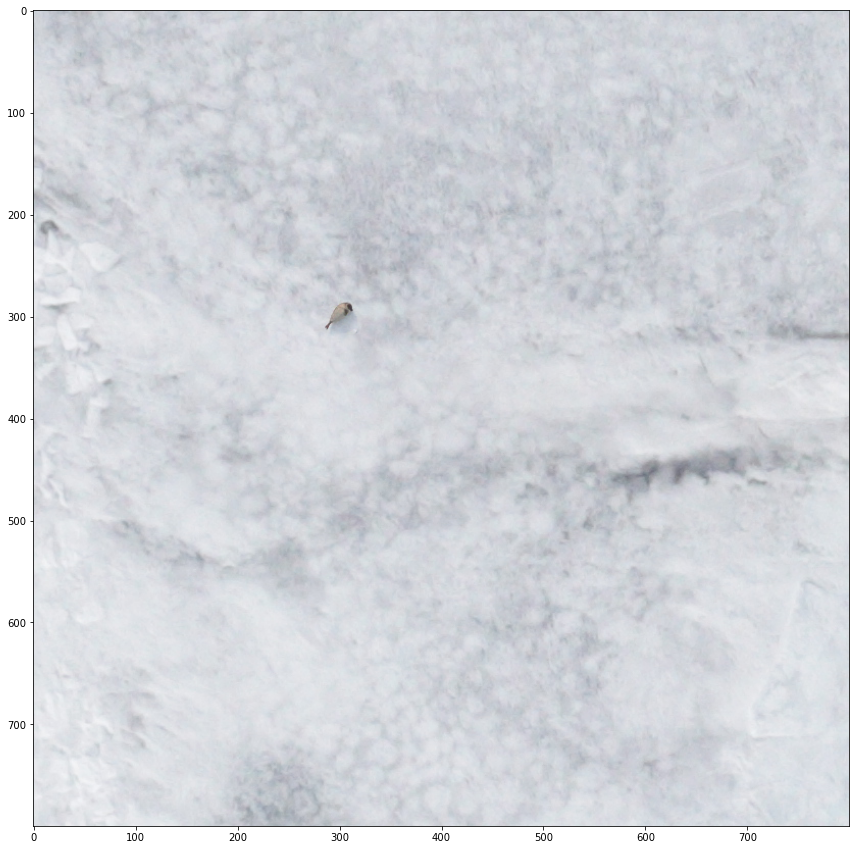

In [122]:
plt.figure(figsize=(15, 15))
plt.imshow(out[...,::-1])

In [123]:
cv2.imwrite('output/out12_resized.jpg', out)

True